In [1]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Activation

Using TensorFlow backend.


In [2]:
# 1. 데이터셋 생성하기

width = 28
height = 28

# 훈련셋과 시험셋 불러오기
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, width * height).astype('float32') / 255.0
x_test = x_test.reshape(10000, width * height).astype('float32') / 255.0

# 훈련셋과 검증셋 분리
x_val = x_train[50000:]
y_val = y_train[50000:]
x_train = x_train[:50000]
y_train = y_train[:50000]

# 데이터셋 전처리 : 홀수는 1, 짝수는 0으로 변환
y_train = y_train % 2
y_val = y_val % 2
y_test = y_test % 2

11493376/11490434 [==============================] - 2s 0us/step


In [0]:
# 2. 모델 구성하기
model = Sequential()
model.add(Dense(256, input_dim=width * height, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
# 3. 모델 학습과정 설정하기
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [6]:
# 4. 모델 학습시키기
hist = model.fit(x_train, y_train, epochs=30, batch_size=32, validation_data=(x_val, y_val))

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 7s 144us/step - loss: 0.3091 - accuracy: 0.8738 - val_loss: 0.1520 - val_accuracy: 0.9467
Epoch 2/30
50000/50000 [==============================] - 6s 111us/step - loss: 0.1268 - accuracy: 0.9552 - val_loss: 0.1065 - val_accuracy: 0.9644
Epoch 3/30
50000/50000 [==============================] - 5s 108us/step - loss: 0.0885 - accuracy: 0.9687 - val_loss: 0.0786 - val_accuracy: 0.9735
Epoch 4/30
50000/50000 [==============================] - 5s 109us/step - loss: 0.0702 - accuracy: 0.9755 - val_loss: 0.0744 - val_accuracy: 0.9736
Epoch 5/30
50000/50000 [==============================] - 5s 109us/step - loss: 0.0595 - accuracy: 0.9793 - val_loss: 0.1704 - val_accuracy: 0.9366
Epoch 6/30
50000/50000 [==============================] - 5s 108us/step - loss: 0.0513 - accuracy: 0.9824 - val_loss: 0.0655 - val_accuracy: 0.9783
Epoch 7/30
50000/50000 [==============================] - 5s 1

In [10]:
print(hist.history.keys())

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


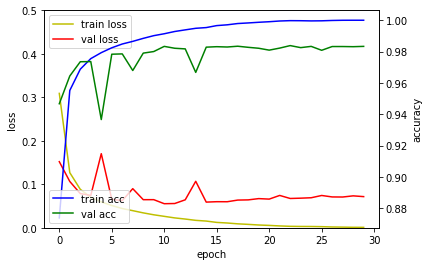

In [11]:
# 5. 학습과정 살펴보기
%matplotlib inline
import matplotlib.pyplot as plt

fig, loss_ax = plt.subplots()

acc_ax = loss_ax.twinx()

loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 0.5])

acc_ax.plot(hist.history['accuracy'], 'b', label='train acc')
acc_ax.plot(hist.history['val_accuracy'], 'g', label='val acc')

loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')

loss_ax.legend(loc='upper left')
acc_ax.legend(loc='lower left')

plt.show()

In [12]:
# 6. 모델 평가하기
loss_and_metrics = model.evaluate(x_test, y_test, batch_size=32)
print('## evaluation loss and metrics ##')
print(loss_and_metrics)

10000/10000 [==============================] - 1s 53us/step
## evaluation loss and metrics ##
[0.05729653679503349, 0.9861999750137329]


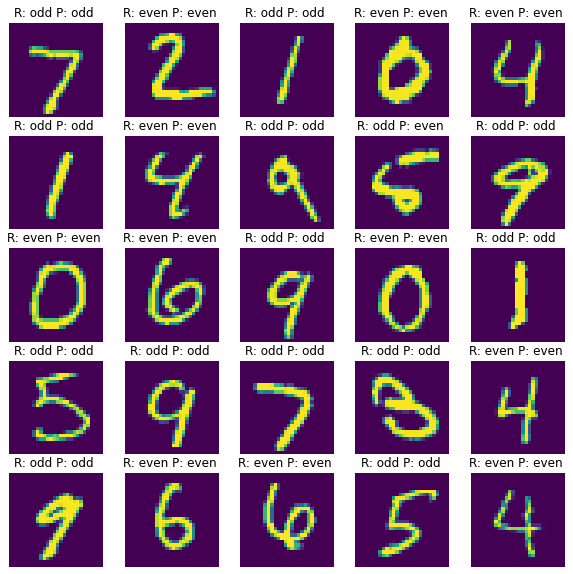

In [14]:
# 7. 모델 사용하기
yhat_test = model.predict(x_test, batch_size=32)

plt_row = 5
plt_col = 5

plt.rcParams['figure.figsize'] = (10, 10)

f, axarr = plt.subplots(plt_row, plt_col)

for i in range(plt_row * plt_col):
    sub_plt = axarr[i // plt_row, i % plt_col]
    sub_plt.axis('off')
    sub_plt.imshow(x_test[i].reshape(width, height))

    sub_plt_title='R: '

    if y_test[i]:
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt_title += 'P: '

    if yhat_test[i] >= 0.5:
        sub_plt_title += 'odd '
    else:
        sub_plt_title += 'even '

    sub_plt.set_title(sub_plt_title)

plt.show()